<a href="https://colab.research.google.com/github/mybenkhadda/YanPort_Duplicate/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [84]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [98]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load data file

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,...,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,...,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,...,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,...,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,...,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


# Explore the data

In [4]:
print(f"Shape of the dataframe is : {df.shape}")

Shape of the dataframe is : (2164, 57)


In [5]:
print(f"Columns in the dataframe are : {[i for i in df.columns]}")

Columns in the dataframe are : ['ID', 'URL', 'CRAWL_SOURCE', 'PROPERTY_TYPE', 'NEW_BUILD', 'DESCRIPTION', 'IMAGES', 'SURFACE', 'LAND_SURFACE', 'BALCONY_SURFACE', 'TERRACE_SURFACE', 'ROOM_COUNT', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'LUNCHROOM_COUNT', 'TOILET_COUNT', 'FURNISHED', 'FIREPLACE', 'AIR_CONDITIONING', 'GARDEN', 'SWIMMING_POOL', 'BALCONY', 'TERRACE', 'CELLAR', 'PARKING', 'PARKING_COUNT', 'HEATING_TYPES', 'HEATING_MODE', 'FLOOR', 'FLOOR_COUNT', 'CONSTRUCTION_YEAR', 'ELEVATOR', 'CARETAKER', 'ENERGY_CONSUMPTION', 'GREENHOUSE_GAS_CONSUMPTION', 'MARKETING_TYPE', 'PRICE', 'PRICE_M2', 'PRICE_EVENTS', 'RENTAL_EXPENSES', 'RENTAL_EXPENSES_INCLUDED', 'DEPOSIT', 'FEES', 'FEES_INCLUDED', 'EXCLUSIVE_MANDATE', 'AGENCIES_UNWANTED', 'OCCUPIED', 'DEALER_NAME', 'DEALER_TYPE', 'CITY_ID', 'CITY', 'ZIP_CODE', 'DEPT_CODE', 'PUBLICATION_START_DATE', 'PUBLICATION_END_DATE', 'LAST_CRAWL_DATE', 'LAST_PRICE_DECREASE_DATE']


In [114]:
df.isnull().sum()

ID                            0
URL                           0
CRAWL_SOURCE                  0
PROPERTY_TYPE                 0
NEW_BUILD                     0
DESCRIPTION                   0
IMAGES                        0
SURFACE                       0
ROOM_COUNT                    0
BEDROOM_COUNT                 0
FURNISHED                     0
GARDEN                        0
SWIMMING_POOL                 0
TERRACE                       0
PARKING                       0
PARKING_COUNT                 0
HEATING_TYPES                 0
HEATING_MODE                  0
FLOOR                         0
CONSTRUCTION_YEAR             0
ELEVATOR                      0
CARETAKER                     0
MARKETING_TYPE                0
PRICE                         0
PRICE_M2                    173
RENTAL_EXPENSES               0
RENTAL_EXPENSES_INCLUDED      0
DEPOSIT                       0
FEES                          0
FEES_INCLUDED                 0
EXCLUSIVE_MANDATE             0
AGENCIES

> Let's delete the columns with 100% NaN values

In [7]:
df = df.drop(["LAND_SURFACE","BALCONY_SURFACE", "BATHROOM_COUNT", "LUNCHROOM_COUNT", "TOILET_COUNT", "FIREPLACE", "AIR_CONDITIONING","BALCONY", "CELLAR", "ENERGY_CONSUMPTION", "GREENHOUSE_GAS_CONSUMPTION", "PUBLICATION_END_DATE", "TERRACE_SURFACE","LAST_CRAWL_DATE","LAST_PRICE_DECREASE_DATE"], axis=1)

## Crawl Source

In [8]:
fig = px.histogram(
    df, x = "CRAWL_SOURCE"
)
fig.show()

> This column could be deleted later to reduce complexity

## PROPERTY_TYPE

In [9]:
fig = px.histogram(
    df, x = "PROPERTY_TYPE"
)
fig.show()

## NEW_BUILD

In [77]:
df['NEW_BUILD'] = df['NEW_BUILD'].fillna(False)

In [78]:
fig = px.histogram(
    df, x = "NEW_BUILD"
)
fig.show()

## SURFACE

In [12]:
df['SURFACE'] = df['SURFACE'].fillna(df["SURFACE"].median())

In [13]:
fig = px.box(df, y="SURFACE")
fig.show()

## ROOM_COUNT

In [14]:
df["ROOM_COUNT"] = df["ROOM_COUNT"].fillna(df["ROOM_COUNT"].median())

In [15]:
fig = px.histogram(
    df, x = "ROOM_COUNT"
)
fig.show()

## BEDROOM_COUNT

In [16]:
df["BEDROOM_COUNT"] = df["BEDROOM_COUNT"].fillna(df["BEDROOM_COUNT"].median())

In [17]:
fig = px.histogram(
    df, x = "BEDROOM_COUNT"
)
fig.show()

## FURNISHED

In [18]:
df["FURNISHED"] = df["FURNISHED"].fillna(df["FURNISHED"].median())

In [19]:
fig = px.histogram(
    df, x = "FURNISHED"
)
fig.show()

## GARDEN

> Publications that didn't mention the GARDEN means that they don't have any, let's fill it with 0

In [20]:
df['GARDEN'] = df['GARDEN'].fillna(0)

In [21]:
fig = px.histogram(
    df, x = "GARDEN"
)
fig.show()

## SWIMMING_POOL

In [22]:
df['SWIMMING_POOL'] = df['SWIMMING_POOL'].fillna(0)

In [23]:
fig = px.histogram(
    df, x = "SWIMMING_POOL"
)
fig.show()

## TERRACE

In [24]:
df['TERRACE'] = df['TERRACE'].fillna(0)

In [25]:
fig = px.histogram(
    df, x = "TERRACE"
)
fig.show()

## PARKING

In [26]:
fig = px.histogram(
    df, x = "PARKING"
)
fig.show()

## PARKING_COUNT

In [27]:
df["PARKING"].value_counts()

False    2007
True      157
Name: PARKING, dtype: int64

> Null values are basically 0,  since the column PARKING is False

In [28]:
df['PARKING_COUNT'] = df['PARKING_COUNT'].fillna(0)

In [29]:
fig = px.histogram(
    df, x = "PARKING_COUNT"
)
fig.show()

## HEATING_TYPES

In [30]:
fig = px.histogram(
    df, x = "HEATING_TYPES"
)
fig.show()

## HEATING_MODE

In [31]:
df['HEATING_MODE'] = df['HEATING_MODE'].fillna("-")

In [32]:
fig = px.histogram(
    df, x = "HEATING_MODE"
)
fig.show()

## FLOOR

In [33]:
df['FLOOR'] = df['FLOOR'].fillna(df['FLOOR'].median())

In [34]:
fig = px.histogram(
    df, x = "FLOOR"
)
fig.show()

## COUNT_FLOOR

In [35]:
fig = px.histogram(
    df, x = "FLOOR_COUNT"
)
fig.show()

In [36]:
df = df.drop(["FLOOR_COUNT"], axis=1)

## CONSTRUCTION_YEAR             

In [37]:
df['CONSTRUCTION_YEAR'] = df['CONSTRUCTION_YEAR'].fillna(df['CONSTRUCTION_YEAR'].median())

In [38]:
fig = px.histogram(
    df, x = "CONSTRUCTION_YEAR", nbins = 50
)
fig.show()

## ELEVATOR

In [39]:
df['ELEVATOR'] = df['ELEVATOR'].fillna(False)

In [40]:
fig = px.histogram(
    df, x = "ELEVATOR"
)
fig.show()

## CARETAKER

In [41]:
df['CARETAKER'] = df['CARETAKER'].fillna(False)

In [42]:
fig = px.histogram(
    df, x = "CARETAKER"
)
fig.show()

## MARKETING_TYPE

In [43]:
fig = px.histogram(
    df, x = "MARKETING_TYPE"
)
fig.show()

## PRICE

In [44]:
import re
pattern = "\"price\":([0-9]+)"
l = []
for i in range(df.shape[0]):
  l.append(int(re.findall(pattern, df[["PRICE_EVENTS"]].iloc[i][0])[0]))

In [45]:
df["PRICE"] = l

In [46]:
fig = px.box(
    df, y = "PRICE"
)
fig.show()

## PRICE_M2

## PRICE_EVENTS

In [47]:
df = df.drop(["PRICE_EVENTS"], axis = 1)

## RENTAL_EXPENSES_INCLUDED

In [48]:
df['RENTAL_EXPENSES_INCLUDED'] = df['RENTAL_EXPENSES_INCLUDED'].fillna(False)

In [49]:
fig = px.histogram(
    df, x = "RENTAL_EXPENSES_INCLUDED"
)
fig.show()

## RENTAL_EXPENSES

In [50]:
l = df["RENTAL_EXPENSES"]
for i in range(df.shape[0]):
  if df.iloc[i]["RENTAL_EXPENSES_INCLUDED"] == False:
      l[i] = 0
df["RENTAL_EXPENSES"] = l

<ipython-input-50-efdfee45cb54>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df['RENTAL_EXPENSES'] = df['RENTAL_EXPENSES'].fillna(df['RENTAL_EXPENSES'].mean())

In [52]:
fig = px.box(
    df, y = "RENTAL_EXPENSES"
)
fig.show()

## DEPOSIT

In [53]:
df['DEPOSIT'] = df['DEPOSIT'].fillna(df['DEPOSIT'].mean())

In [54]:
fig = px.box(
    df, y = "DEPOSIT"
)
fig.show()

## FEES_INCLUDED

In [55]:
df['FEES_INCLUDED'] = df['FEES_INCLUDED'].fillna(False)

In [56]:
fig = px.histogram(
    df, x = "FEES_INCLUDED"
)
fig.show()

## FEES

In [57]:
df['FEES'] = df['FEES'].fillna(0)

In [58]:
fig = px.box(
    df, y = "FEES"
)
fig.show()

## EXCLUSIVE_MANDATE

In [59]:
df['EXCLUSIVE_MANDATE'] = df['EXCLUSIVE_MANDATE'].fillna(False)

In [60]:
fig = px.histogram(
    df, x = "EXCLUSIVE_MANDATE"
)
fig.show()

## AGENCIES_UNWANTED

In [61]:
df['AGENCIES_UNWANTED'] = df['AGENCIES_UNWANTED'].fillna(False)

In [62]:
fig = px.histogram(
    df, x = "AGENCIES_UNWANTED"
)
fig.show()

## OCCUPIED

In [63]:
df['OCCUPIED'] = df['OCCUPIED'].fillna(False)

In [64]:
fig = px.histogram(
    df, x = "OCCUPIED"
)
fig.show()

## DEALER

In [65]:
fig = px.histogram(
    df, x = "DEALER_TYPE"
)
fig.show()

In [66]:
df['DEALER_NAME'] = df['DEALER_NAME'].fillna("-")

In [67]:
fig = px.histogram(
    df, x = "DEALER_NAME"
)
fig.show()

## LOCATION

In [68]:
df[['CITY', 'ZIP_CODE', 'DEPT_CODE']].head()

,CITY,ZIP_CODE,DEPT_CODE
0,Levallois-Perret,92300.0,92
1,Levallois-Perret,92300.0,92
2,Levallois-Perret,92300.0,92
3,Levallois-Perret,92300.0,92
4,Levallois-Perret,92300.0,92


In [69]:
fig = px.histogram(
    df, x = "CITY"
)
fig.show()

In [70]:
df = df.drop(['CITY_ID', 'CITY', 'ZIP_CODE', 'DEPT_CODE'], axis =1)

## DESCRIPTION



In [80]:
df['DESCRIPTION'] = df['DESCRIPTION'].fillna("-")

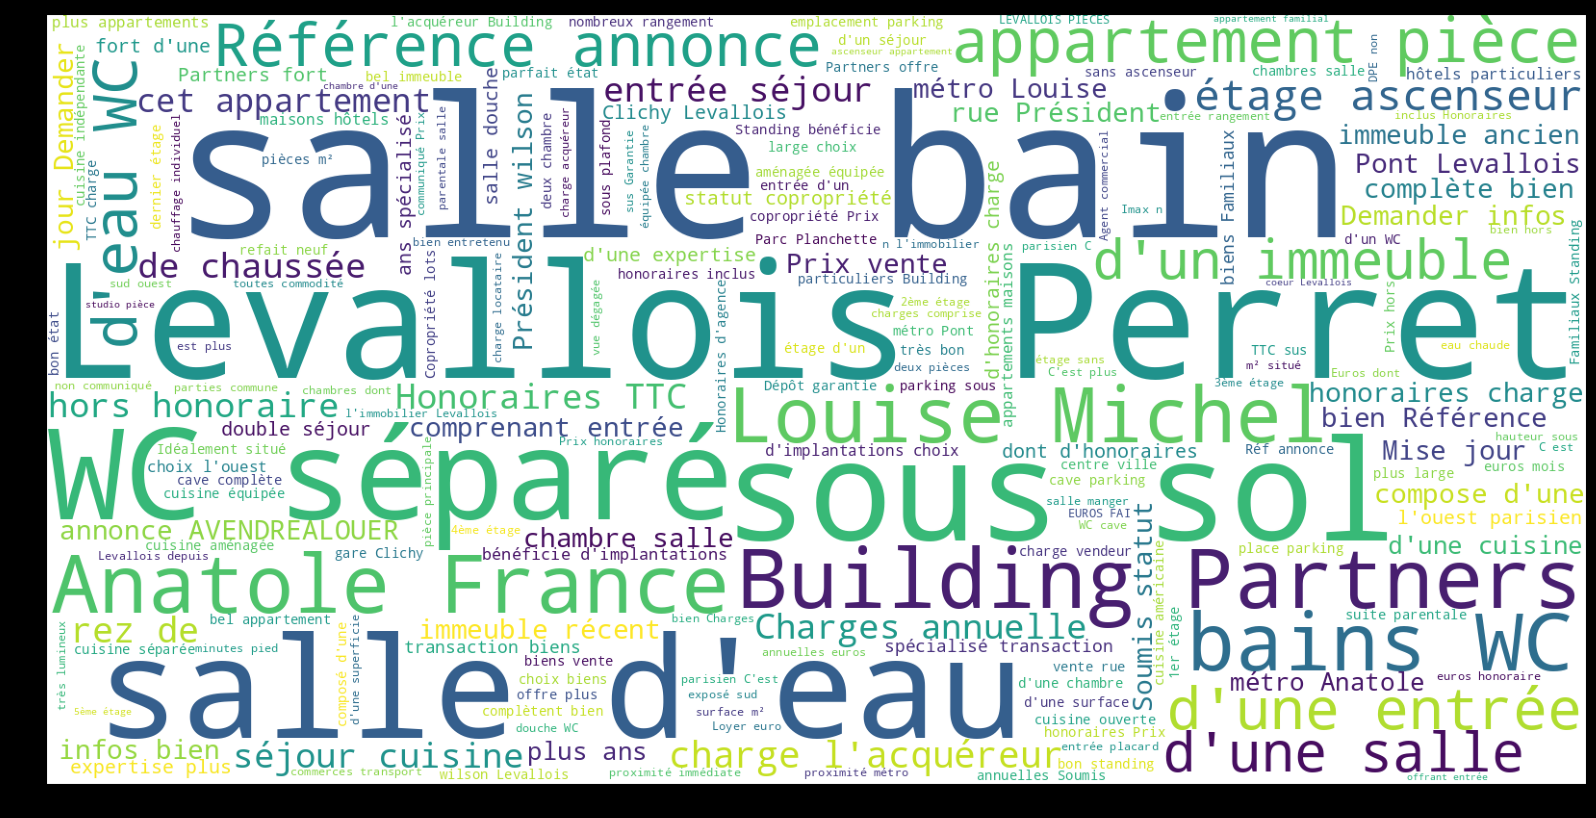

In [113]:
stop_words = stopwords.words('english') + stopwords.words('french')
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join([w for w in ' '.join(df['DESCRIPTION']).split(" ") if not w.lower() in stop_words]))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
[w for w in ' '.join(df['DESCRIPTION']) if not w.lower() in stop_words]

In [112]:
for w in ' '.join(df['DESCRIPTION']).split(" "):
  print(w)
  break

Au
